## Week 3

### Level 1

    1.1.
        - For state representation you would only need current location, and view forward. How far forward
        would determine how far the agent could plan.
        - 1 minus for the location roughness, and a bouns at the end.
        - It's a finite MDP, you can only move in one direction, downwards and eventually you will get to the bottom.
        - It is an episodic task since you finish when you get to the bottom,
         it is not something you are contiously doing, like Week 1 exercise example.
    1.2
        - Since there is no probability involved when you are doing the action "go straight"
            p(s'(x+1,y)| s(x,y), "go straight) = 1
            p(s'(x+1,y+1)| s(x,y), "go straight) = 0
            p(s'(x+1,y-1)| s(x,y), "go straight) = 0
    1.3
        - I would not use a discount value here for since it is the total lap that counts, and we don't have any
        randomness or difficulty involved, e.g. if a more difficult path was faster, but you could fail and go slower.
        Then a discount would be more relevant I believe, when the action had uncertainty of result.
    1.4
        - 3^100, it is getting warm already.
    1.5
        - Maybe multiply the roughness value by the diagonal if you ar going left or right, roughness * 1.21.
        I'm unfortunatly not a geometer...


In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
with open("../Data/the_hill.txt") as file:
    hill_txt = file.read()

hill = hill_txt.split('\n')
hill = np.asarray([np.asarray([float(x) for x in row.split('\t')]) for row in hill])

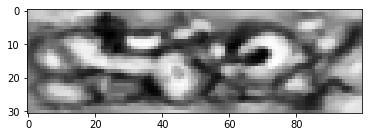

In [25]:
plt.imshow(hill, cmap='gray')

### Level 2

In [26]:
#Sum of sledding down the middle line(1- roughness) for each step
lars_time = np.sum([1-hill[16][x] for x in range(100)])
print('Lars reward: ' + str(lars_time))

Lars reward: 38.34509633999999


Diagram for all states other than edges, row 0 and 30.

![Diagram](../Imgs/pd.png)

In the edge cases Anne-Lise would have 2/3 of a chance of going towards the center of the course.



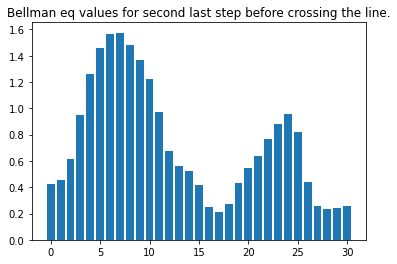

In [27]:
def anne_lise_bellmann_value_for_policy_loc(loc_x, loc_y):
    if loc_y == 0:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in [0, 0, 1]])
    elif loc_y == 30:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in [0, 0, -1]])
    else:
        values = sum([1/3 * (1-hill[loc_y + dy][loc_x+1]) for dy in range(-1, 2)])
    return values + 1 - hill[loc_y][loc_x]


v_s_100 = []


for i in range(31):
    v_s_100.append(anne_lise_bellmann_value_for_policy_loc(loc_x=98, loc_y=i))

plt.bar(range(31), v_s_100)
plt.title("Bellman eq values for second last step before crossing the line.")
plt.show()

As we can see from the bar graph the values match with the darker areas of the last column of
the image.

In [28]:
v_s =[v_s_100]
def avg_next_step(y, x):
    if y == 0:
        values = [v_s[x][y+dy] for dy in [0, 0, 1]]
    elif y == 30:
        values = [v_s[x][y+dy] for dy in [0, 0, -1]]
    else:
        values = [v_s[x][y+dy] for dy in [0, -1, 1]]
    return values



for i in range(97, -1, -1):
    col = []
    for j in range(31):
        next_step = avg_next_step(j, 97-i)
        col.append(1- hill[j, i] + np.mean(next_step))
    v_s.append(col)
print(f"Anne-Lise expected reward {v_s[len(v_s)-1][16]}")

Anne-Lise expected reward48.43514239891776


So the expected value for Anne-Lise is $\approx$ 48. I'm not sure i did the Bellman equation right,
so here is my thought process/calculations so you don't have to understand the code.

Start at last step with actions that give reward, column 99/i=98, and find the value of each Expected_value in
that column. So Expected_value[98][y] = Reward[98][y] + 1/3 * Reward[99][y-1] + 1/3 * Reward[99][y] + 1/3 * Reward[99][y+1],
and the fence cases taken into account, Reward[x][y] = 1-hill[x][y].
After that I work my way up the hill Expected_value[x][y] = Reward[x][y] + 1/3 * Expected_value[x+1][y-1] + 1/3 * Expected_value[x+1][y] +
                                                                             1/3 * Expected_value[x+1][y+1]


Since we are calculation each locations value just once we have a runtime of O(locations) so O(300) in our case, if we
were to calculate all possible trajectories we would have to do 3^100, and since we did all possible starting points also
the equivalent to 31x3^100 = 1.59767031427e+49

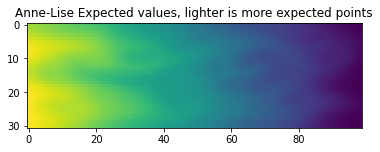

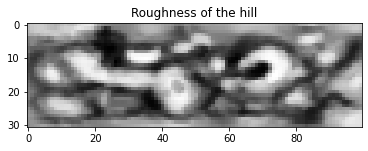

In [42]:
img =[[]]*31
for row_idx in range(31):
        img[row_idx] = [v_s[col_idx][row_idx] for col_idx in range(98, -1, -1)]
plt.title("Anne-Lise Expected values, lighter is more expected points")
plt.imshow(img)
plt.pause(0.01)
plt.title("Roughness of the hill")
plt.imshow(hill, cmap='gray')
print()